In [1]:
from pathlib import Path 
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt 

In [2]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'

In [3]:
path_data = Path('data')
path_data.mkdir(exist_ok=True)

In [4]:
from urllib.request import urlretrieve

path_gz = path_data/'mnist.pkl.gz'
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz)

In [5]:
!ls -l data

total 34688
-rw-r--r--@ 1 mchristos  staff  17051982 28 Nov 07:49 mnist.pkl.gz


In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [7]:
x_train.shape

(50000, 784)

In [8]:
lst = list(x_train[0])

In [9]:
lst[200:210]

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [10]:
def chunks(x, sz):
    for i in range(0,len(x),sz):
        yield x[i:i+sz]
        # print(i, i+sz)

In [11]:
chunks(lst,28)

<generator object chunks at 0x114e2d310>

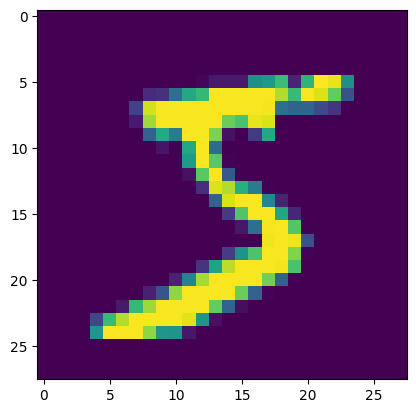

In [12]:
# mpl.rcParams['image.cmap'] = 'gray'
plt.imshow(list(chunks(lst, 28)));

In [13]:
from itertools import islice

In [14]:
thing = iter([1,2,3,4,5,6])
list(islice(thing, 4))

[1, 2, 3, 4]

In [15]:
list(thing)

[5, 6]

In [16]:
vals = lst[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [17]:
iter(vals)

In [18]:
it = iter(lst)
img = list(iter(lambda: list(islice(it, 28)), []))

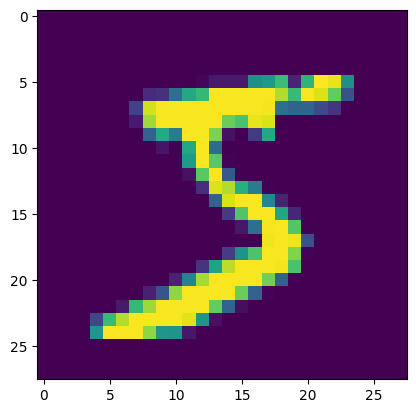

In [19]:
plt.imshow(img);

In [20]:
[x[3:7] for x in img]

[[0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0703125],
 [0.0, 0.21484375, 0.671875, 0.8828125],
 [0.0, 0.53125, 0.98828125, 0.98828125],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

In [21]:
img[20][15]

0.98828125

In [22]:
class Matrix:
    def __init__(self, data): self.data = data
    def __getitem__(self, idxs):
        i,j = idxs
        return self.data[i][j]

In [23]:
mat = Matrix(img)

In [24]:
mat[20,15]

0.98828125

In [25]:
import torch
from torch import tensor

In [26]:
tensor(x_train)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [27]:
x_train, y_train, x_valid, y_valid = map(tensor, [x_train, y_train, x_valid, y_valid])

In [28]:
x_train.shape

torch.Size([50000, 784])

In [29]:
imgs = x_train.reshape([-1,28,28])
imgs.shape

torch.Size([50000, 28, 28])

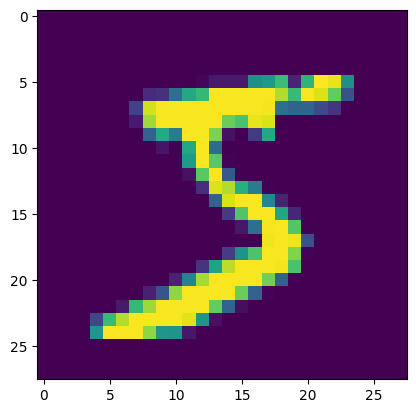

In [30]:
plt.imshow(imgs[0]);

## Matrix multiplication

In [33]:
torch.manual_seed(1)
weights = torch.randn(784, 10)
bias = torch.zeros(10)

In [34]:
m1 = x_valid[:5]
m2 = weights

In [35]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [36]:
t1 = torch.zeros(5, 10)
for i in range(m1.shape[0]): # 5
    for j in range(m2.shape[1]): # 10
        for k in range(m1.shape[1]): # 784
            t1[i,j] += m1[i,k] * m2[k,j]

In [37]:
torch.set_printoptions(linewidth=140, precision=2)

In [38]:
t1

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [39]:
import numpy as np 
np.set_printoptions(linewidth=140, precision=2)

In [40]:
def matmul(m1,m2):
    m = torch.zeros(5, 10)
    for i in range(m1.shape[0]): # 5
        for j in range(m2.shape[1]): # 10
            for k in range(m1.shape[1]): # 784
                m[i,j] += m1[i,k] * m2[k,j]
    return m

In [41]:
%time _=matmul(m1,m2)

CPU times: user 598 ms, sys: 4.07 ms, total: 602 ms
Wall time: 601 ms


## Numba 

In [42]:
# !pip install numba 

In [43]:
from numba import njit 

In [44]:
@njit
def dot(a, b):
    res = 0
    for i in range(len(a)): res += a[i]*b[i]
    return res 

In [45]:
%time dot(np.array([1.,2,3]), np.array([4.,5,6]))

CPU times: user 689 ms, sys: 243 ms, total: 932 ms
Wall time: 629 ms


32.0

In [46]:
%time dot(np.array([1.,2,3]), np.array([4.,5,6]))

CPU times: user 20 µs, sys: 2 µs, total: 22 µs
Wall time: 24.1 µs


32.0

## Einstein summation 

In [55]:
torch.einsum??

Signature: torch.einsum(*args: Any) -> torch.Tensor
Source:   
def einsum(*args: Any) -> Tensor:
    r"""einsum(equation, *operands) -> Tensor

    Sums the product of the elements of the input :attr:`operands` along dimensions specified using a notation
    based on the Einstein summation convention.

    Einsum allows computing many common multi-dimensional linear algebraic array operations by representing them
    in a short-hand format based on the Einstein summation convention, given by :attr:`equation`. The details of
    this format are described below, but the general idea is to label every dimension of the input :attr:`operands`
    with some subscript and define which subscripts are part of the output. The output is then computed by summing
    the product of the elements of the :attr:`operands` along the dimensions whose subscripts are not part of the
    output. For example, matrix multiplication can be computed using einsum as `torch.einsum("ij,jk->ik", A, B)`.
    Here, j

In [51]:
mr = torch.einsum("ij,jk->ijk", m1, m2)

In [52]:
mr.shape

torch.Size([5, 784, 10])

In [53]:
mr.sum(1)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])

In [54]:
torch.einsum("ij,jk->ik", m1, m2)

tensor([[-10.94,  -0.68,  -7.00,  -4.01,  -2.09,  -3.36,   3.91,  -3.44, -11.47,  -2.12],
        [ 14.54,   6.00,   2.89,  -4.08,   6.59, -14.74,  -9.28,   2.16, -15.28,  -2.68],
        [  2.22,  -3.22,  -4.80,  -6.05,  14.17,  -8.98,  -4.79,  -5.44, -20.68,  13.57],
        [ -6.71,   8.90,  -7.46,  -7.90,   2.70,  -4.73, -11.03, -12.98,  -6.44,   3.64],
        [ -2.44,  -6.40,  -2.40,  -9.04,  11.18,  -5.77,  -8.92,  -3.79,  -8.98,   5.28]])